In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv("C:/Users/Shubham/train_mnist.csv")
test = pd.read_csv('C:/Users/Shubham/test_mnist.csv')

In [7]:
train.head(),test.head()

(   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
 0      1       0       0       0       0       0       0       0       0   
 1      0       0       0       0       0       0       0       0       0   
 2      1       0       0       0       0       0       0       0       0   
 3      4       0       0       0       0       0       0       0       0   
 4      0       0       0       0       0       0       0       0       0   
 
    pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
 0       0  ...         0         0         0         0         0         0   
 1       0  ...         0         0         0         0         0         0   
 2       0  ...         0         0         0         0         0         0   
 3       0  ...         0         0         0         0         0         0   
 4       0  ...         0         0         0         0         0         0   
 
    pixel780  pixel781  pixel782  pixel783  
 0         0   

In [8]:
x_train= np.array(train.iloc[:,1:])
y_train = np.array(train.iloc[:,:1])

x_train.shape,y_train.shape

((42000, 784), (42000, 1))

In [9]:
x_test = np.array(test.iloc[:,:])
x_test.shape

(28000, 784)

In [10]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

In [11]:
x_train_img = x_train.reshape(42000,28,28)

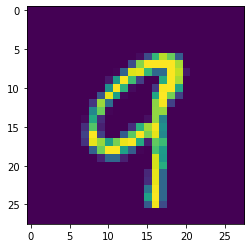

In [12]:
## plotting the images
plt.imshow(x_train_img[41999])
plt.show()

In [13]:
## importing libraries from Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.
C:\Users\Shubham\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Shubham\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Shubham\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Shubham\Anaconda3\lib\site-packages\tensorflow\python\framework\d

In [14]:
## to convert test image to one hot encoded
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(42000, 10)

In [15]:
from sklearn.model_selection import train_test_split
#x_train1,x_test1,y_train1,y_test1 = train_test_split(x_train,y_train,test_size=0.2,random_state = 0)

In [16]:
#x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

In [17]:
x_train = x_train.reshape(42000,28,28,1)
#x_test1 = x_test1.reshape(8400,28,28,1)
x_train.shape#,x_test1.shape

(42000, 28, 28, 1)

In [18]:
x_test = x_test.reshape(28000,28,28,1)
x_test.shape

(28000, 28, 28, 1)

In [19]:
model = Sequential()

In [20]:
## adding convolution and pooling layers
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Dropout(0.29))
## flatten krke dense layer me run krvana h
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.37))
model.add(Dense(10,activation='softmax'))

In [21]:

# compiling 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(x_train,y_train,epochs=3)#,validation_data=(x_test1,y_test1))

Epoch 1/3
42000/42000 [==============================] - 366s 9ms/step - loss: 0.0401 - accuracy: 0.9881
Epoch 2/3
42000/42000 [==============================] - 301s 7ms/step - loss: 0.0421 - accuracy: 0.9878
Epoch 3/3
42000/42000 [==============================] - 444s 11ms/step - loss: 0.0367 - accuracy: 0.9888


In [24]:
op = model.predict(x_test)

In [25]:
op = np.argmax(op,axis = 1)
op[0]


2

In [26]:
op = pd.Series(op,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),op],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [22]:
q = x_test.reshape(28000,28,28)